In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Principal Component Analysis overview

 - PCA is an unsupervised pre-processing task that is carried out before applying any ML algorithm. 
 - To implement PCA in Scikit learn, it is essential to standardize/normalize the data before applying PCA.
 - PCA is imported from sklearn.decomposition. 
 - We need to select the required number of principal components, where n_components is usually chosen to be 2 for better visualization but it matters and depends on data.
 - PCA is also one of the popular tools used for EDA.
 - Lecture Slides 7 to 9
 
 
   

## Scikit-learn (sklearn) implementation overview

In [2]:
from sklearn.decomposition import PCA

In [5]:
df = pd.DataFrame({
    'feature_a':[2,1.5,2,2.5,3,2.5,3.7,2.8,1.8,3.3],
    'feature_b':[1,1.2,2,1.5,3,2.4,3.5,2.8,1.5,2.5],
    'target':['a','a','a','a','b','b','b','b','a','b']})
df

,feature_a,feature_b,target
0,2.0,1.0,a
1,1.5,1.2,a
2,2.0,2.0,a
3,2.5,1.5,a
4,3.0,3.0,b
5,2.5,2.4,b
6,3.7,3.5,b
7,2.8,2.8,b
8,1.8,1.5,a
9,3.3,2.5,b


In [9]:
from sklearn.preprocessing import StandardScaler

df_features = df[['feature_a', 'feature_b']]
df_features = StandardScaler().fit_transform(df_features)

In [10]:
pca = PCA(n_components=2)
PCs = pca.fit_transform(df_features)

In [12]:
df_new = pd.DataFrame(data=PCs, columns = {'PC1', 'PC2'})
df_new['target'] = df['target']

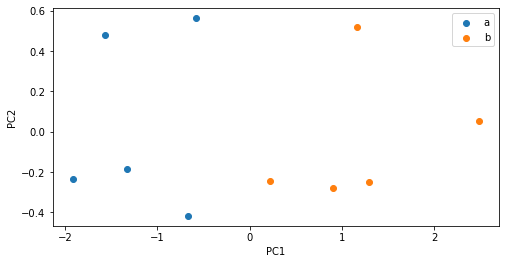

In [13]:
fig = plt.figure(figsize = (8, 4))
ax = fig.add_subplot()
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
targets = ['a', 'b']
colors = ['r', 'b']
for target, color in zip(targets, colors):
    rows = df_new['target'] == target
    ax.scatter(df_new.loc[rows, 'PC1'],
               df_new.loc[rows, 'PC2'])
    ax.legend(targets)

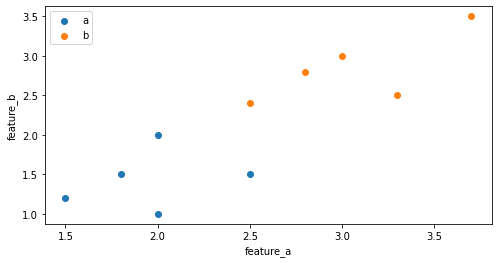

In [14]:
fig = plt.figure(figsize = (8, 4))
ax = fig.add_subplot()
ax.set_xlabel('feature_a')
ax.set_ylabel('feature_b')
targets = ['a', 'b']
colors = ['r', 'b']
for target, color in zip(targets, colors):
    rows = df['target'] == target
    ax.scatter(df.loc[rows, 'feature_a'],
               df.loc[rows, 'feature_b'])
    ax.legend(targets)

In [17]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.93606831, 0.06393169])

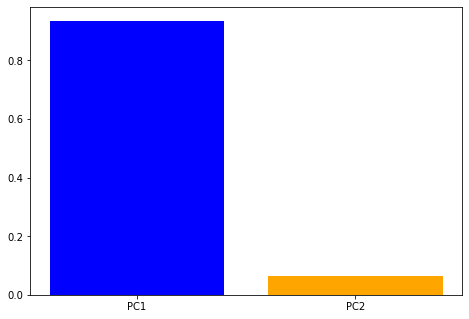

In [21]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['PC1', 'PC2']
variance = [explained_variance[0], explained_variance[1]]
ax.bar(langs, variance, color=['blue', 'orange'])
# Show plot
plt.show()

## Choosing a good value for PCA Dimensionality Reduction

In [24]:
from sklearn.datasets import make_regression

# Dataset
X, y = make_regression(n_features=100, n_informative=40, random_state=12)

In [25]:
#Reduce Dimensionality
pca = PCA(n_components=2)
# Fit
pca_2d = pca.fit_transform(X)
df_2d = pd.DataFrame(pca_2d, columns=['PC1', 'PC2'])

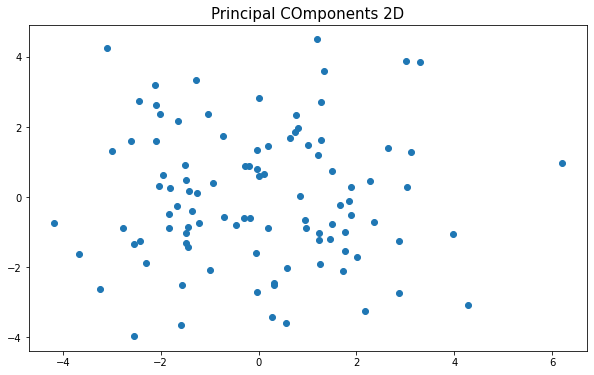

In [26]:
#Plot 2D PCA
plt.figure(figsize=(10,6))
plt.scatter(x=df_2d.PC1, y=df_2d.PC2)
plt.title('Principal COmponents 2D', size=15);

In [27]:
# Variance comprehend in 2D
pca.explained_variance_ratio_

array([0.03874607, 0.03712152])

In [28]:
# Reduce Dimensionality
pca95 = PCA(n_components=0.95)
# Fit
transformed = pca95.fit_transform(X)

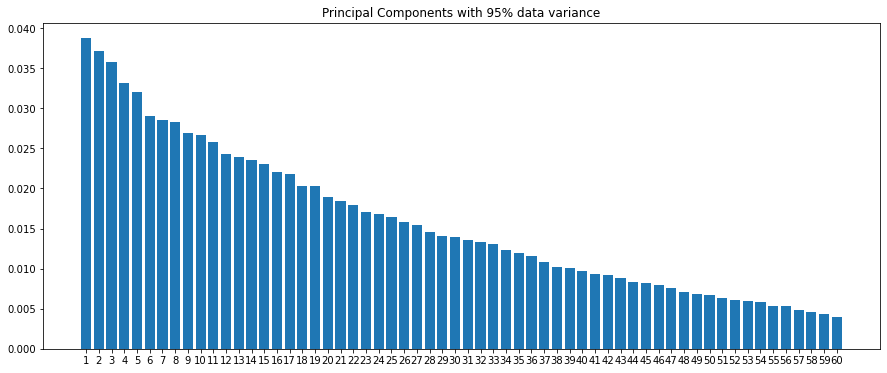

In [33]:
# Plot
plt.figure(figsize=(15, 6))
plt.bar(x= [str(i) for i in range(1,pca95.n_components_+1)], height= pca95.explained_variance_ratio_,)
plt.title('Principal Components with 95% data variance');

## Image compression


In [34]:
mnist = pd.read_csv('Data/mnist.csv')
mnist.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
mnist.drop(columns='label', inplace=True)
mnist.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# Look at the shape of the data
mnist.shape

(60000, 784)

## Display an image

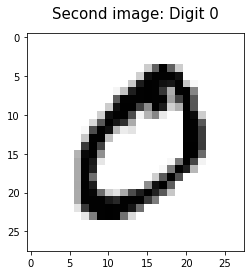

In [38]:
second_image = mnist.iloc[1].values.reshape([28, 28])
plt.imshow(second_image, cmap='gray_r')
plt.title('Second image: Digit 0', fontsize=15, pad=15)
plt.savefig('Second image.png')

# Apply PCA

## Choose the right number of dimensions through Scree plot


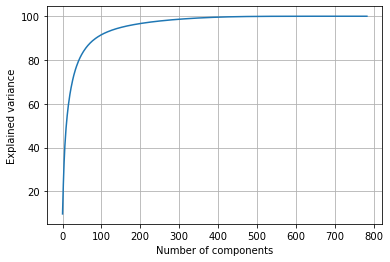

In [39]:
pca_784 = PCA(n_components=784)
pca_784.fit(mnist)

plt.grid()
plt.plot(np.cumsum(pca_784.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.savefig('Scree_plotpng')

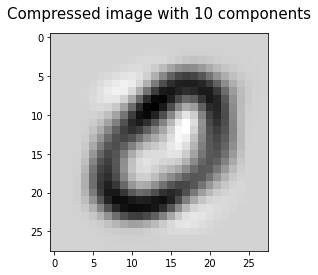

In [41]:
pca_10 = PCA(n_components=10)
mnist_pca_10_reduced = pca_10.fit_transform(mnist)
mnist_pca_10_recovered = pca_10.inverse_transform(mnist_pca_10_reduced)

image_pca_10 = mnist_pca_10_recovered[1,:].reshape([28, 28])
plt.imshow(image_pca_10, cmap='gray_r')
plt.title('Compressed image with 10 components', fontsize=15, pad=15)
plt.savefig('image_pca_10.png')

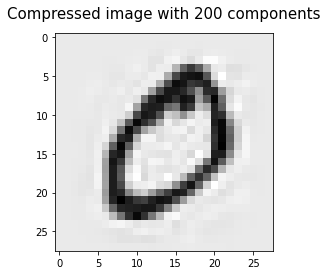

In [43]:
pca_200 = PCA(n_components=200)
mnist_pca_200_reduced = pca_200.fit_transform(mnist)
mnist_pca_200_recovered = pca_200.inverse_transform(mnist_pca_200_reduced)

image_pca_200 = mnist_pca_200_recovered[1,:].reshape([28, 28])
plt.imshow(image_pca_200, cmap='gray_r')
plt.title('Compressed image with 200 components', fontsize=15, pad=15)
plt.savefig('image_pca_200.png')

In [45]:
np.cumsum(pca_200.explained_variance_ratio_ * 100)[-1]

96.60445480151822

# PCA for Data Visualization 

## Load

In [48]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

# load dataset into Pandas DF
df = pd.read_csv(url, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])

## Scale

In [51]:
from sklearn.preprocessing import StandardScaler

features = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Separating out the features
x = df.loc[:, features].values

# Seperating out the target
y = df.loc[:, ['target']].values

# Scaling the features
x = StandardScaler().fit_transform(x)

## PCA Projection 

In [53]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDF = pd.DataFrame(data = principalComponents,
                           columns = ['principal component 1', 'principal component 2'])
principalDF

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [55]:
finalDF = pd.concat([principalDF, df[['target']]], axis=1)
finalDF

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


## Visualize Projection

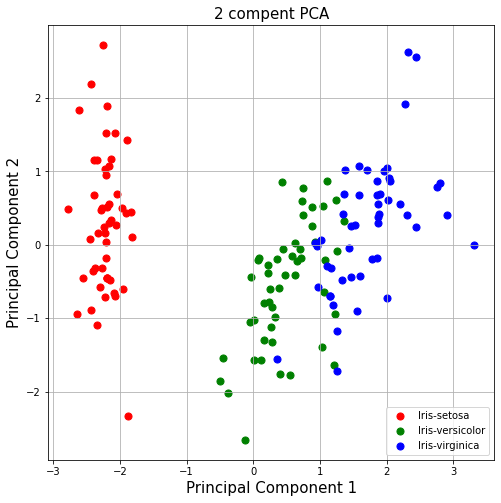

In [63]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 compent PCA', fontsize = 15)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = finalDF['target'] == target
    ax.scatter(finalDF.loc[indicesToKeep, 'principal component 1'],
               finalDF.loc[indicesToKeep, 'principal component 2'],
               c = color,
               s = 50) # sf no s provided it still shows marker at 50 points

ax.legend(targets)
ax.grid()

In [64]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

# PCA with PyCaret

In [71]:
# load dataset 
from pycaret.datasets import get_data
from pycaret.anomaly import *
anomaly = get_data('anomaly')

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10
0,0.263995,0.764929,0.138424,0.935242,0.605867,0.518790,0.912225,0.608234,0.723782,0.733591
1,0.546092,0.653975,0.065575,0.227772,0.845269,0.837066,0.272379,0.331679,0.429297,0.367422
2,0.336714,0.538842,0.192801,0.553563,0.074515,0.332993,0.365792,0.861309,0.899017,0.088600
3,0.092108,0.995017,0.014465,0.176371,0.241530,0.514724,0.562208,0.158963,0.073715,0.208463
4,0.325261,0.805968,0.957033,0.331665,0.307923,0.355315,0.501899,0.558449,0.885169,0.182754


In [67]:
anomaly.shape

(1000, 10)

In [68]:
# initialization
clf1 = setup(data = anomaly, pca = True, pca_components = 2)

,Description,Value
0,session_id,1879
1,Original Data,"(1000, 10)"
2,Missing Values,False
3,Numeric Features,10
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(1000, 2)"
9,CPU Jobs,-1


In [69]:
pca = create_model('pca')

In [72]:
pca_results = assign_model(pca)

In [73]:
pca_results[150:200]

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Anomaly,Anomaly_Score
150,0.691351,0.367101,0.511583,0.852513,0.823794,0.836812,0.893979,0.593720,0.848779,0.208776,0,7.551448
151,0.935555,0.678677,0.429532,0.279246,0.832340,0.935093,0.875117,0.560478,0.848593,0.186407,0,8.072559
152,0.437847,0.264980,0.161035,0.668884,0.833887,0.468962,0.450088,0.378114,0.389255,0.604750,0,5.722810
153,0.072218,0.374549,0.839726,0.245905,0.737058,0.851123,0.615558,0.624904,0.402099,0.658913,0,6.366479
154,0.676361,0.380908,0.416358,0.953632,0.825669,0.537941,0.756028,0.587986,0.685991,0.367306,0,4.905763
155,0.468884,0.707271,0.743343,0.161945,0.848607,0.542312,0.270209,0.635980,0.232172,0.831462,0,7.239712
156,0.543821,0.047277,0.872301,0.071924,0.734480,0.908664,0.664297,0.389108,0.489796,0.507420,0,6.534273
157,0.655523,0.060692,0.710021,0.135259,0.794210,0.520442,0.339918,0.257839,0.407717,0.420947,0,5.892542
158,0.693529,0.496649,0.643449,0.417408,0.843679,0.507800,0.959133,0.524652,0.974473,0.036503,0,7.494994
159,0.108878,0.721714,0.194781,0.773900,0.051582,0.133011,0.226268,0.223779,0.293556,0.511741,0,6.412853


# BACK TO SLIDES

# <b> END OF ML LECTURE ON UNSUPERVISED LEARNING SESSION 1